# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.242330e+01     7.698015e+00
 * time: 0.004305124282836914
     1     2.991087e+01     5.440130e+00
 * time: 0.01310110092163086
     2     2.806800e+01     1.202556e+01
 * time: 0.03347015380859375
     3     2.471658e+01     9.789648e+00
 * time: 0.05605912208557129
     4     1.388047e+01     2.694139e+00
 * time: 0.08219313621520996
     5     1.191514e+01     1.328901e+00
 * time: 0.10102415084838867
     6     1.059655e+01     1.557846e+00
 * time: 0.12017416954040527
     7     9.894506e+00     9.286619e-01
 * time: 0.13545513153076172
     8     9.440204e+00     1.435071e+00
 * time: 0.1506960391998291
     9     9.136794e+00     5.694105e-01
 * time: 0.1667180061340332
    10     9.133221e+00     1.396776e+00
 * time: 0.17877912521362305
    11     9.087163e+00     1.161655e+00
 * time: 0.19089317321777344
    12     8.991453e+00     5.962726e-01
 * time: 0.20684218406677246
    13     8.967408e+00     1.204362e+00
 * time: 

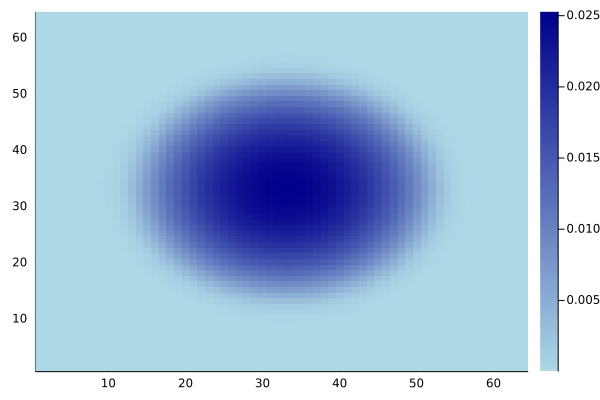

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)